<a href="https://colab.research.google.com/github/dinethpiyumantha/Handwritten-Number-Predictor/blob/master/handwritten_number_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Old Code

In [29]:
!pip install numpy
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [30]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
# reshape
x_train_reshaped = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test_reshaped = x_test.reshape(-1, 28*28).astype("float32") / 255.0
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [34]:
# create a model
def createModel():
  model = keras.Sequential()
  model.add(keras.Input(shape=28*28))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  return model

In [35]:
# initialize a model
model = createModel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 550346 (2.10 MB)
Trainable params: 550346 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [37]:
# compile the model
model.compile(
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  metrics=["accuracy"]
    )

model.fit(x_train_reshaped, y_train, batch_size=32, epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 18s - loss: 0.1921 - accuracy: 0.9416 - 18s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 16s - loss: 0.0872 - accuracy: 0.9732 - 16s/epoch - 8ms/step
Epoch 3/5
1875/1875 - 16s - loss: 0.0598 - accuracy: 0.9814 - 16s/epoch - 8ms/step
Epoch 4/5
1875/1875 - 17s - loss: 0.0476 - accuracy: 0.9848 - 17s/epoch - 9ms/step
Epoch 5/5
1875/1875 - 17s - loss: 0.0377 - accuracy: 0.9883 - 17s/epoch - 9ms/step


In [38]:
# evalute model
model.evaluate(x_test_reshaped, y_test, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.0721 - accuracy: 0.9807 - 1s/epoch - 3ms/step


[0.07207262516021729, 0.9807000160217285]

In [39]:
# save the model (.h5 or .keras)
model.save('model.keras')

In [40]:
# make a prediction
import numpy as np

predictions = model.predict(x_test_reshaped[1:2])
predicted_classes = np.argmax(predictions, axis=1)
print("Index=", 1, "predicted_classes=", predicted_classes)

1/1 [==============================] - 0s 67ms/step
Index= 1 predicted_classes= [2]


--2024-02-08 02:45:23--  https://www.shutterstock.com/image-vector/number-four-ink-brush-260nw-2385172237.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 13.35.116.13, 13.35.116.127, 13.35.116.57, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|13.35.116.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6967 (6.8K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   6.80K  --.-KB/s    in 0s      

2024-02-08 02:45:23 (102 MB/s) - ‘image.jpg’ saved [6967/6967]



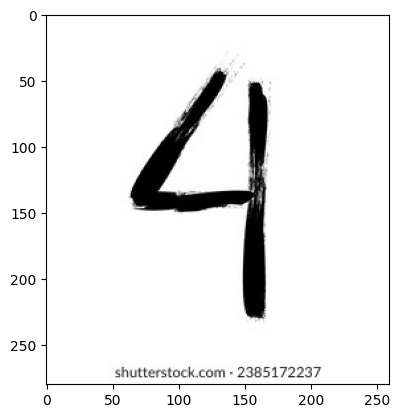

In [48]:
# download image
!wget https://www.shutterstock.com/image-vector/number-four-ink-brush-260nw-2385172237.jpg -O image.jpg

import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('image.jpg')
plt.imshow(image, cmap='gray')
plt.show()

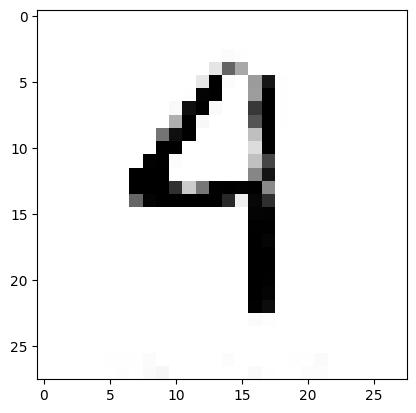

1/1 [==============================] - 0s 69ms/step
[[ -9.843986   -1.3087358   2.3638783   7.0528603 -10.2932415   4.949139
  -12.023764    3.078315   -3.332349   -3.3514943]]


In [49]:
# load a model and predict
import numpy as np

# load model
loaded_model = keras.models.load_model('model.keras')

# preprocess
image = tf.keras.preprocessing.image.load_img('image.jpg', color_mode='grayscale', target_size=(28, 28))
plt.imshow(image, cmap='gray')
plt.show()

image_array = tf.keras.preprocessing.image.img_to_array(image)

# reshape
image_array = image_array.reshape(-1, 28*28).astype("float32") / 255.0

# make prediction
predictions = loaded_model.predict(image_array)
predicted_classes = np.argmax(predictions, axis=1)
print(predictions)
